In [ ]:
# Bibliotecas
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt
from skimage.transform import rescale
import cv2

In [ ]:
# Lendo imagens
img = tif.imread('L71221071_07120010720_DN.tif')
sar = tif.imread('S1_DF_GRD.tif')

In [ ]:
# Função para redimensionar imagens
def resample(source, target, scale):

  scaled = rescale(source, (scale,scale))

  if target.shape[0] < scaled.shape[0]:
    scaled = scaled[:target.shape[0],:]
  else:
    target = target[:scaled.shape[0],:]
        
  if target.shape[1] < scaled.shape[1]:
    scaled = scaled[:,:target.shape[1]]
  else:
    target = target[:,:scaled.shape[1]]
  
  return scaled

In [ ]:
#Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = 0,255  
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)        
    p = x + (img - w) * (y - x) / (z - w)    
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

In [ ]:
# Criando planos de informação
ndvi = (img[:,:,3] - img[:,:,2] )  /  ( img[:,:,3] + img[:,:,2])
sobelx = cv2.Sobel(src=ndvi, ddepth=-1,  dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=ndvi, ddepth=-1, dx=0, dy=1, ksize=5)
vv = resample(sar[:,:,0], ndvi, 1/3)
vh = resample(sar[:,:,1], ndvi, 1/3)
razao = vv/vh

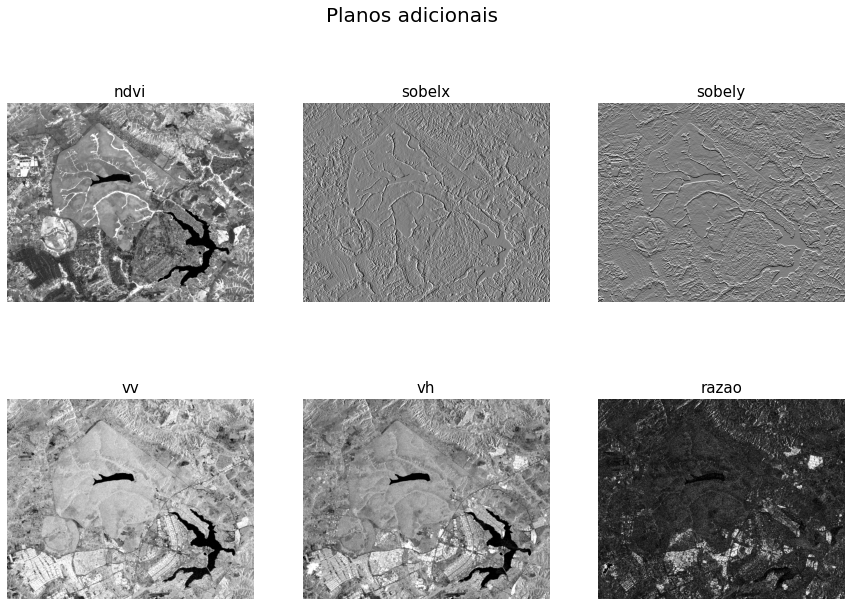

In [ ]:
# Empilhando planos de informação
stack_features = np.dstack([ndvi, sobelx, sobely, vv, vh, razao])

lista_nomes= ['ndvi', 'sobelx', 'sobely', 'vv', 'vh', 'razao']

#Plotando em um gráfico de duas linhas e três colunas
fig,axes = plt.subplots(2,3,figsize=(15,10),sharex='all', sharey='all') 
fig.suptitle('Planos adicionais', fontsize=20) 
axes = axes.ravel() 
for i in range(stack_features.shape[2]): 
  axes[i].imshow(expansao(stack_features[:,:,i]),cmap='gray') 
  axes[i].set_title(lista_nomes[i],fontsize=15) 
  axes[i].axis('off')

In [ ]:
# Empilhando todas as variáveis
stack_final = np.dstack([img, stack_features])
print(stack_final.shape)

(1233, 1520, 12)


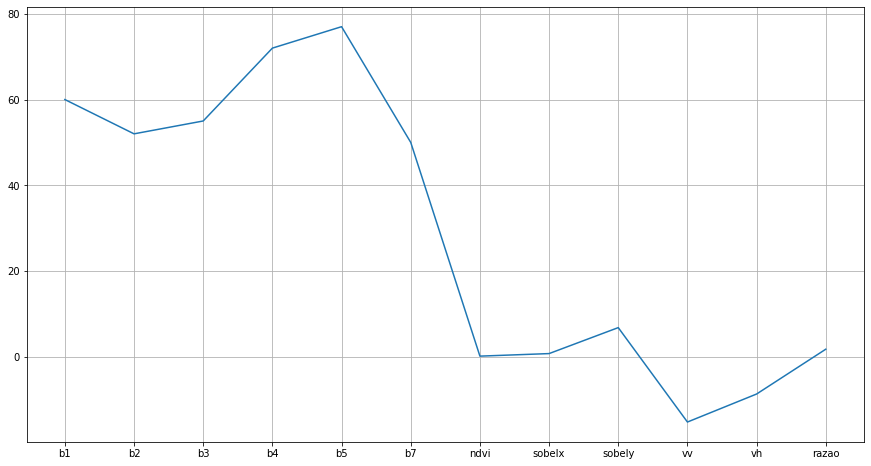

In [ ]:
# Visualizando dados de um pixel específico
lista_bandas = ['b1', 'b2', 'b3','b4','b5','b7','ndvi', 'sobelx', 'sobely', 'vv', 'vh', 'razao']
plt.figure(figsize=(15,8))
plt.plot(lista_bandas, stack_final[1000,1000,:])
plt.grid()
plt.show()